# Bike sharing


### Understanding the Dataset

##### Independent Variables
- datetime:   date and hour in "mm/dd/yyyy hh:mm" format
- season:     Four categories-> 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday:    whether the day is a holiday or not (1/0)
- workingday: whether the day is neither a weekend nor holiday (1/0)
- weather:    Four Categories of weather
            1-> Clear, Few clouds, Partly cloudy, Partly cloudy
            2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3-> Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp:       hourly temperature in Celsius
- atemp:      "feels like" temperature in Celsius
- humidity:   relative humidity
- windspeed:  wind speed

##### Dependent Variables
- registered: number of registered user
- casual:     number of non-registered user
- count:      number of total rentals (registered + casual)


In [1]:
import os
print(os.listdir("../dataset/Bike-Sharing-Dataset/"))

['day.csv', 'hour.csv', 'Readme.txt']


In [2]:
#Loading all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Importing the data
df = pd.read_csv("../dataset/Bike-Sharing-Dataset/day.csv")

train_df = df.loc[0:600,:]
test_df = df.loc[600:]

In [4]:
train_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print(df.shape)
print(train_df.shape)
print(test_df.shape)

(731, 16)
(601, 16)
(131, 16)


In [6]:
# Looking at al the unique values in the column

train_df.nunique()


instant       601
dteday        601
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          436
atemp         571
hum           514
windspeed     545
casual        512
registered    567
cnt           579
dtype: int64

In [7]:
train_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,301.000000,2.276206,0.392679,5.690516,0.026622,2.996672,0.687188,1.384359,0.503037,0.480521,0.623743,0.192843,827.128120,3404.620632,4231.748752
std,173.638033,1.031302,0.488753,3.207916,0.161111,2.001663,0.464025,0.544997,0.188751,0.168114,0.146308,0.076059,680.361611,1424.691710,1826.895778
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,151.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.341667,0.340258,0.507500,0.138058,261.000000,2378.000000,2913.000000
50%,301.000000,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,0.511667,0.498725,0.622500,0.184696,692.000000,3445.000000,4302.000000
75%,451.000000,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,0.673333,0.624371,0.729583,0.233208,1088.000000,4238.000000,5382.000000
max,601.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6790.000000,8362.000000


In [8]:
#Checking in there are any null values in the columns and their data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 16 columns):
instant       601 non-null int64
dteday        601 non-null object
season        601 non-null int64
yr            601 non-null int64
mnth          601 non-null int64
holiday       601 non-null int64
weekday       601 non-null int64
workingday    601 non-null int64
weathersit    601 non-null int64
temp          601 non-null float64
atemp         601 non-null float64
hum           601 non-null float64
windspeed     601 non-null float64
casual        601 non-null int64
registered    601 non-null int64
cnt           601 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 75.2+ KB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# test_df["casual"] = np.nan
# test_df["registered"] = np.nan
# test_df["cnt"] = np.nan

In [10]:
print(test_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [11]:
print(train_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [12]:
test_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765
601,602,2012-08-24,3,1,8,0,5,1,2,0.702500,0.647100,0.615000,0.072146,1325,6257,7582
602,603,2012-08-25,3,1,8,0,6,0,2,0.661667,0.618696,0.712917,0.244408,1829,4224,6053
603,604,2012-08-26,3,1,8,0,0,0,2,0.653333,0.595996,0.845833,0.228858,1483,3772,5255
604,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917


In [13]:
train_df['dteday'] = pd.to_datetime(train_df['dteday'])
test_df['dteday'] = pd.to_datetime(test_df['dteday'])

C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Feature engineering 

In [14]:
test_df['year'] = test_df['dteday'].dt.year
test_df['month'] = test_df['dteday'].dt.month
test_df['hour'] = test_df['dteday'].dt.hour
test_df['DOW'] = test_df['dteday'].dt.dayofweek

train_df['year'] = train_df['dteday'].dt.year
train_df['month'] = train_df['dteday'].dt.month
train_df['hour'] = train_df['dteday'].dt.hour
train_df['DOW'] = train_df['dteday'].dt.dayofweek

C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [15]:
train_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,hour,DOW
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,0,5
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,0,6
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,0,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,0,2


In [16]:
ind_variable_selected = ['workingday', 'temp', 'year', 'month', 'hour', 'DOW']

In [17]:
x_orig_train = train_df[ind_variable_selected]
y_orig_train = train_df['cnt']


In [18]:
x_orig_test = test_df[ind_variable_selected]
y_orig_test = test_df['cnt']


In [19]:
x_orig_train.head()

,workingday,temp,year,month,hour,DOW
0,0,0.344167,2011,1,0,5
1,0,0.363478,2011,1,0,6
2,1,0.196364,2011,1,0,0
3,1,0.200000,2011,1,0,1
4,1,0.226957,2011,1,0,2


In [20]:
y_orig_train.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [21]:
hour_df = pd.read_csv("../dataset/Bike-Sharing-Dataset/hour.csv")

In [22]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Create smaller training and validation sets

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(x_orig_train, y_orig_train, test_size=0.25, random_state=40)

In [24]:
x_train.head()

,workingday,temp,year,month,hour,DOW
484,0,0.458333,2012,4,0,6
438,1,0.572500,2012,3,0,2
334,1,0.312500,2011,12,0,3
363,1,0.311667,2011,12,0,4
328,1,0.375000,2011,11,0,4


In [25]:
x_valid.head()

,workingday,temp,year,month,hour,DOW
159,1,0.808333,2011,6,0,3
307,1,0.403333,2011,11,0,4
253,0,0.653333,2011,9,0,6
529,1,0.655833,2012,6,0,2
137,1,0.550000,2011,5,0,2


### Set up the scoring rule

In [26]:
def RMSLE(predictions, realizations):
    prediction_use = predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(prediction_use + 1) - np.log(realizations + 1)) **2 ))
    return rmsle

### Fit a regression tree
A regression tree is tuned with min_samples_split. Its default setting is 20, which means 20 samples are required in any node for that node to be split on. Once a node has fewer than 20 samples in it, no more split will occur. 

In [27]:
x_orig_test = test_df[ind_variable_selected]
y_orig_test = test_df['cnt']

In [28]:
rt = DecisionTreeRegressor(min_samples_split=25, random_state=40)
rt_model = rt.fit(x_train, y_train)
rt_pred = rt_model.predict(x_orig_test)

In [29]:
rt_pred

array([7271.68421053, 6876.22222222, 6475.57142857, 6475.57142857,
       7271.68421053, 7271.68421053, 7271.68421053, 7271.68421053,
       6001.26666667, 6876.22222222, 6876.22222222, 7271.68421053,
       7271.68421053, 7271.68421053, 7271.68421053, 6876.22222222,
       6475.57142857, 6475.57142857, 5267.6       , 6438.04545455,
       8099.        , 6475.57142857, 6475.57142857, 6475.57142857,
       7494.        , 5267.6       , 6475.57142857, 6438.04545455,
       6438.04545455, 8099.        , 6475.57142857, 6438.04545455,
       5267.6       , 6438.04545455, 6475.57142857, 6475.57142857,
       6475.57142857, 6438.04545455, 6438.04545455, 5267.6       ,
       7494.        , 6475.57142857, 6475.57142857, 6475.57142857,
       6438.04545455, 4949.77777778, 3881.86956522, 6438.04545455,
       6438.04545455, 6438.04545455, 6438.04545455, 3881.86956522,
       6438.04545455, 5267.6       , 6438.04545455, 6438.04545455,
       6438.04545455, 6438.04545455, 6438.04545455, 6438.04545

In [33]:
RMSLE(rt_pred,y_orig_test)


0.6049333309802636

In [31]:
pd.DataFrame(rt_model.feature_importances_, index=ind_variable_selected)

,0
workingday,0.000000
temp,0.657603
year,0.276439
month,0.054356
hour,0.000000
DOW,0.011602


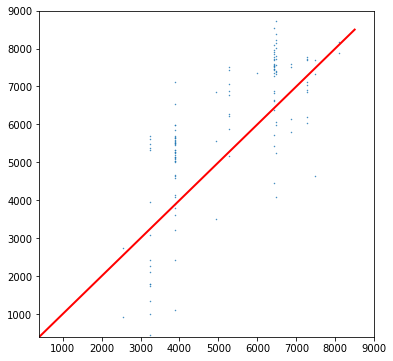

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(rt_pred,y_orig_test, s=0.2)
plt.xlim(400,9000)
plt.ylim(400,9000)
plt.plot([400,8500],[400, 8500], color='r',linestyle='-',linewidth=2)
plt.show()

### Random Forest

In [35]:
rf = RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=5,random_state=201)
rf_model = rf.fit(x_train,y_train)
rf_pred = rf.predict(x_valid)

In [36]:
RMSLE(rf_pred,y_valid)

0.23267748386158907

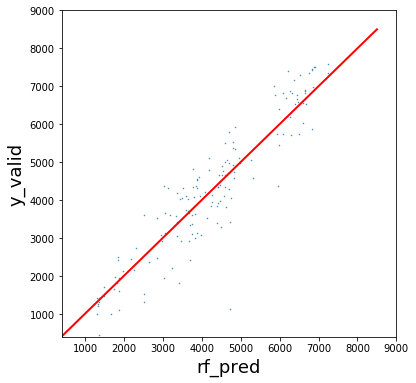

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(rf_pred,y_valid, s=0.2)
plt.xlim(400,9000)
plt.ylim(400,9000)
plt.plot([400,8500],[400, 8500], color='r',linestyle='-',linewidth=2)
plt.xlabel('rf_pred',fontsize=18)
plt.ylabel('y_valid',fontsize=18)
plt.show()

### Boosted Tree Model

In [43]:
import xgboost as xgb

xgb_train = xgb.DMatrix(x_train,label=y_train)
xgb_valid = xgb.DMatrix(x_valid)

C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
